# Sarah Bowman

In [96]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.table import Table
import matplotlib.colors as clr

In [97]:
def deriv(vec):
    
    m = 1.0 #kg
    g = 9.8 #m/s**2
    l = 1.0 #m
    
    t = vec[0]
    theta1 = vec[1]
    theta2 = vec[2]
    theta3 = vec[3]
    p_theta1 = vec[4]
    p_theta2 = vec[5]
    p_theta3 = vec[6]
    
    a = np.cos(theta1 - theta2)
    b = np.cos(theta1 - theta3)
    c = np.cos(theta2 - theta3)
    
    A = p_theta1
    B = p_theta2
    C = p_theta3
    
    dtdt = 1.0
    
    dtheta1dt = 4*(18*a*B - 24*a*c*C + 16*A*c**2 -21*A - 16*b*B*c + 28*b*C)\
    /(m*l**2*(108*a**2 - 192*a*b*c + 112*b**2 + 176*c**2 - 231))
    dtheta2dt = 4*(18*a*A - 24*a*b*C - 16*A*b*c + 16*b**2*B - 33*B + 44*c*C)\
    /(m*l**2*(108*a**2 - 192*a*b*c + 112*b**2 + 176*c**2 - 231))
    dtheta3dt = 4*(36*a**2*C - 24*a*A*c - 24*a*b*B + 28*A*b + 44*B*c - 77*C)\
    /(m*l**2*(108*a**2 - 192*a*b*c + 112*b**2 + 176*c**2 - 231))
    
    dp_theta1dt = 1/2.*m*l**2.*dtheta1dt*(-3*dtheta2dt*np.sin(theta1-theta2)\
    -2*dtheta3dt*np.sin(theta1-theta3)) - 5/2.*m*g*l*np.sin(theta1)
    dp_theta2dt = 1/2.*m*l**2*dtheta2dt*(3*dtheta1dt*np.sin(theta1-theta2)\
    -2*dtheta3dt*np.sin(theta2-theta3)) - 3./2*m*g*l*np.sin(theta2)
    dp_theta3dt = 1/2.*m*l**2*dtheta3dt*(2*dtheta2dt*np.sin(theta2-theta3)\
    +2.*dtheta1dt*np.sin(theta1-theta3)) - 1/2.*m*g*l*np.sin(theta3)
    
    return np.array([dtdt,dtheta1dt,dtheta2dt,dtheta3dt,dp_theta1dt,dp_theta2dt,dp_theta3dt])

In [98]:
def RK4(t_array,var_array,derivative):
    """
    Numerically integrates unp.sing Runge Kutta method
    
    Receives:
    t_array -> array with times to integrate
    pos_vel_array -> array containing the variables to be integrated
    derivative -> derivative function computing all derivatives
    
    Returns:
    results -> 2D array with all the data
    
    """
    
    dt = t_array[1] - t_array[0]
    
    flipth1 = []
    flipth2 = []
    flipth3 = []
    
    nfth1 = 0
    nfth2 = 0
    nfth3 = 0
    
    
    results= np.zeros((len(t_array), len(var_array)) )

    for i, t in enumerate(t_array):
        results[i] = var_array

        k1 = dt*derivative(var_array)
        k2 = dt*derivative(var_array + k1/2.)
        k3 = dt*derivative(var_array + k2/2.)
        k4 = dt*derivative(var_array + k3)
        
        var_array = var_array + k1/6. + k2/3. + k3/3. + k4/6.
        
        if np.abs(results[0][1]-var_array[1])>(2*np.pi*(nfth1 + 1)):
            flipth1.append(var_array[0])
            nfth1 += 1
        if np.abs(results[0][2]-var_array[2])>(2*np.pi*(nfth2 + 1)):
            flipth2.append(var_array[0])
            nfth2 += 1
        if np.abs(results[0][3]-var_array[3])>(2*np.pi*(nfth3 + 1)):
            flipth3.append(var_array[0])
            nfth3 += 1
    
    column_names =['t','theta1','theta2','theta3','p_theta1','p_theta2','p_theta3']
    data= Table(results,names=column_names)

    return data,np.array(flipth1),np.array(flipth2),np.array(flipth3)

In [105]:
times = np.linspace(0,10,10000)
t_0 = 0
theta1_0 = np.pi/2
theta2_0 = np.pi/2
theta3_0 = np.pi/2
p_theta1_0 = 0
p_theta2_0 = 0
p_theta3_0 = 0
initcond = np.array([t_0,theta1_0,theta2_0,theta3_0,p_theta1_0,p_theta2_0,p_theta3_0])
var_array = initcond

In [106]:
sol,flipth1,flipth2,flipth3 = RK4(times,var_array,deriv)

In [107]:
def phaseportrait(th1,th2,th3,end,nsteps,pth1=0,pth2=0,pth3=0,save=False):

    times = np.linspace(0,end,nsteps)

    theta1_0 = th1
    theta2_0 = th2
    theta3_0 = th3
    p_theta1_0 = pth1
    p_theta2_0 = pth2
    p_theta3_0 = pth3

    initcond = np.array([t_0,theta1_0,theta2_0,theta3_0,p_theta1_0,p_theta2_0,p_theta3_0])
    var_array = initcond

    sol,flipth1,flipth2,flipth3 = RK4(times,var_array,deriv)

    import matplotlib.pyplot as plt
    %matplotlib inline

    a = np.cos(sol["theta1"] - sol["theta2"])
    b = np.cos(sol["theta1"] - sol["theta3"])
    c = np.cos(sol['theta2'] - sol['theta3'])

    A = sol["p_theta1"]
    B = sol['p_theta2']
    C = sol['p_theta3']

    dtheta1dt = 4*(18*a*B - 24*a*c*C + 16*A*c**2 -21*A - 16*b*B*c + 28*b*C)\
        /(m*l**2*(108*a**2 - 192*a*b*c + 112*b**2 + 176*c**2 - 231))
    dtheta2dt = 4*(18*a*A - 24*a*b*C - 16*A*b*c + 16*b**2*B - 33*B + 44*c*C)\
        /(m*l**2*(108*a**2 - 192*a*b*c + 112*b**2 + 176*c**2 - 231))
    dtheta3dt = 4*(36*a**2*C - 24*a*A*c - 24*a*b*B + 28*A*b + 44*B*c - 77*C)\
        /(m*l**2*(108*a**2 - 192*a*b*c + 112*b**2 + 176*c**2 - 231))
    fig = plt.figure()    
    plt.plot(sol["theta1"],dtheta1dt,".", ms=.5, color = "blue")
    plt.plot(sol["theta2"],dtheta2dt,".", ms=.5, color = "red")
    plt.plot(sol["theta3"],dtheta3dt,".",ms=.5, color = "green")
    if save:
        plt.savefig(save)

<IPython.core.display.Javascript object>


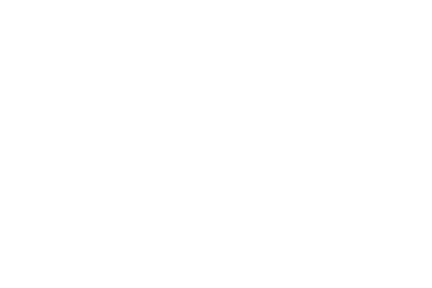

<IPython.core.display.Javascript object>


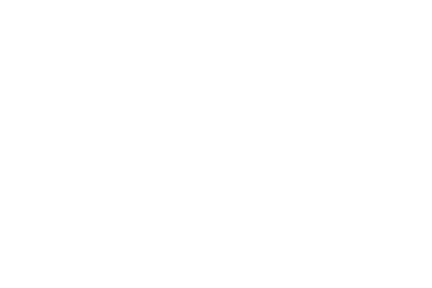

In [17]:
    m = 1.0 #kg
    g = 9.8 #m/s**2
    l = 1.0 #m

    x1 = l*np.sin(sol['theta1'])
    y1 = -l*np.cos(sol['theta1'])
    x2 = l*(np.sin(sol['theta1'])+np.sin(sol['theta2']))
    y2 = -l*(np.cos(sol['theta1'])+np.cos(sol['theta2']))
    x3 = l*(np.sin(sol['theta1'])+np.sin(sol['theta2'])+np.sin(sol['theta3']))
    y3 = -l*(np.cos(sol['theta1'])+np.cos(sol['theta2'])+np.cos(sol['theta3']))
      
import matplotlib.animation as animation
%matplotlib nbagg

def plots(i):
        #plt.plot(x1[i],y1[i], ".", color="blue")
        #plt.plot(x2[i],y2[i], ".", color="red")
        #plt.plot(x3[i],y3[i], ".", color="green")
        #plt.xlim([-3,3])
        #plt.ylim([-3,3])
        plt.plot(np.array([x1[i],x2[i],x3[i]])\
         ,np.array([y1[i],y2[i],y3[i]]), color = "green")
plt.xlim(-12,4)
plt.ylim(-15,15)

fig = plt.figure()
        
anim = animation.FuncAnimation(fig,plots,
                               interval=1,
                               frames=len(x1)/10,
                               repeat=True)  

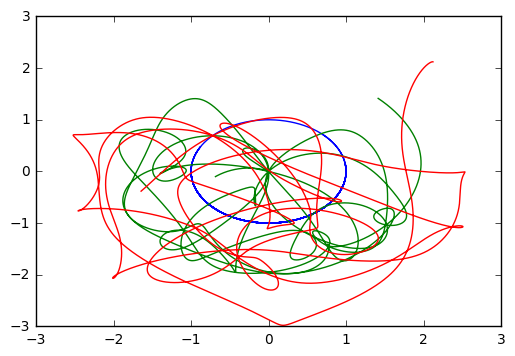

In [102]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.plot(x3,y3)
plt.show()

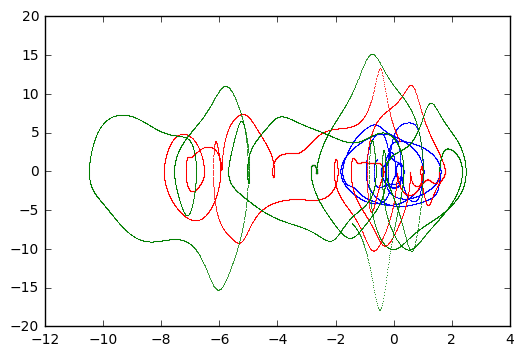

In [103]:
phaseportrait(np.pi/2.,np.pi/2.,np.pi/2.,10,10000,save = "plotd.pdf")

In [64]:
def flows3D(integrator,t_array,deriv,theta1_0,theta2_0,theta3_0,Nsteps=100):
    inits = []
    reSOLts = []
    flipth1s = np.empty((len(theta1_0),len(theta2_0),len(theta3_0)),dtype= list)
    flipth2s = np.empty((len(theta1_0),len(theta2_0),len(theta3_0)),dtype= list)
    flipth3s = np.empty((len(theta1_0),len(theta2_0),len(theta3_0)),dtype= list)
    for i in range(len(theta1_0)): 
        for j in range(len(theta2_0)): 
            for k in range(len(theta3_0)): 
                sol,flipth1,flipth2,flipth3 = integrator(t_array,np.array([t_array[0],theta1_0[i],\
                                                                           theta2_0[j],theta3_0[k],0,0,0]),deriv)
                reSOLts.append(sol)
                flipth1s[i][j][k] = flipth1
                flipth2s[i][j][k] = flipth2
                flipth3s[i][j][k] = flipth3
                
    return theta1_0, theta2_0, theta3_0, reSOLts, flipth1s,flipth2s,flipth3s

In [65]:
theta1_0, theta2_0, theta3_0, reSOLts, flipth1s,flipth2s,flipth3s= flows3D(RK4,np.linspace(0,10,10000),deriv,np.linspace(0,np.pi,5)\
                                                     ,np.linspace(0,np.pi,5),np.linspace(0,np.pi,5))

In [104]:
x = len(theta1_0)
y = len(theta2_0)
Map = np.empty((x,y), dtype = float)

for k in range(len(theta3_0)):
    for i in range(x):
        for j in range(y):
            try:
                Map[i][j] = np.min(np.array([flipth1s[i][j][k],flipth2s[i][j][k],flipth3s[i][j][k]]))
            except ValueError:
                Map[i][j] = 0


    image = plt.imshow(Map)
    image.set_interpolation('nearest')
    #plt.show()
#print Map


TypeError: object of type 'float' has no len()

In [117]:
test = np.array([[[1,2],[3,4],[5,6]],[[7,8],[9,10],[11,12]],[[13,14],[15,16],[17,18]]])
print test

[[[ 1  2]
  [ 3  4]
  [ 5  6]]

 [[ 7  8]
  [ 9 10]
  [11 12]]

 [[13 14]
  [15 16]
  [17 18]]]


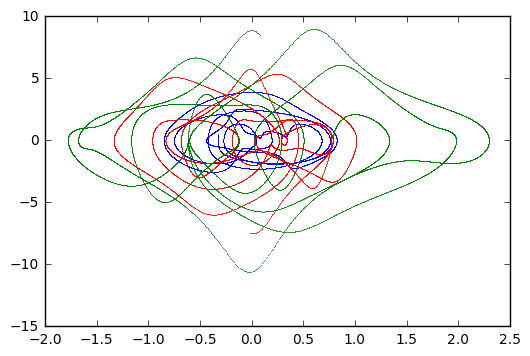

In [95]:
phaseportrait(np.pi/4.,np.pi/4.,np.pi/4.,10,10000,save = "plotb.pdf")

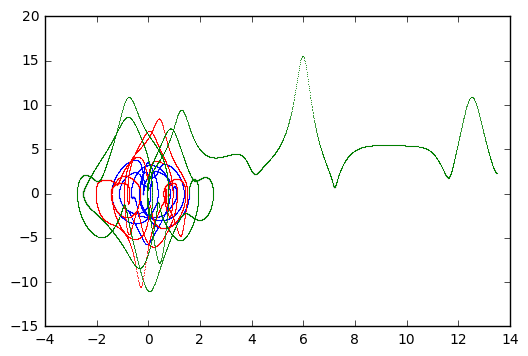

In [94]:
phaseportrait(np.pi/2.,np.pi/4.,np.pi/2.,10,10000,save = "plota.pdf")

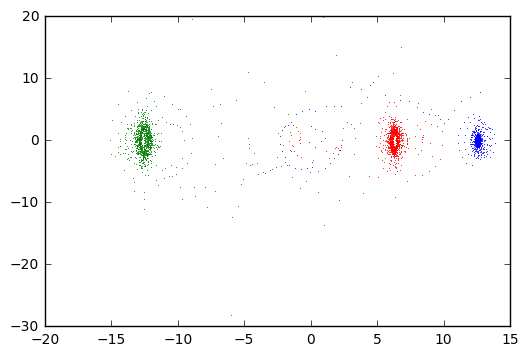

In [87]:
phaseportrait(3*np.pi/4.,3*np.pi/4.,3*np.pi/4.,100,1000,save = "plot1.pdf")

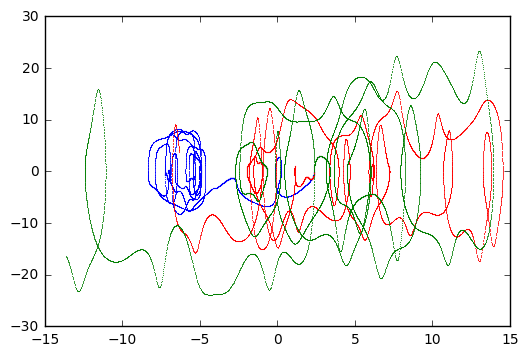

In [93]:
phaseportrait(3*np.pi/4.,3*np.pi/4.,3*np.pi/4.,10,10000,save = "plot2.pdf")

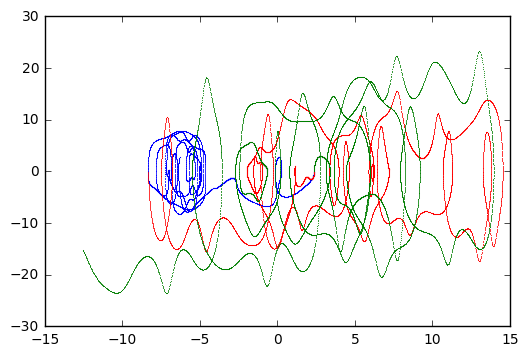

In [92]:
phaseportrait(3.000001*np.pi/4.,3.000001*np.pi/4.,3.000001*np.pi/4.,10,10000,save = "plotc.pdf")